<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 9</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [5]:
using PyPlot
using SymPy

### Ejercicio 1

Se realiza una rutina para calcular la derivada numérica de una función partiendo de su definición pero sin el límite:

$$f'(x_{0})\approx \frac{f(x_{0}+h)-f(x_{0})}{h}:=\frac{\Delta\:f(x_{0},h)}{h},$$

donde $\Delta\:f(x_{0},h)$ se conoce como _diferencia finita hacia adelante_, así que esta aproximación es la _derivada numérica hacia adelante_.

In [2]:
function derivadaNumerica(f,x0,h)
    
    df = (f(x0+h)-f(x0))/h
    
    return df
    
end;

In [3]:
f(x)=cos(x);

In [4]:
derivadaNumerica(f,0.5,0.02)

-0.4881691106361441

### Ejercicio 2

Se extiende la definición de la rutina anterior para calcular la derivada numérica para varias $h$.

In [42]:
function derivada_Numerica(f,x0,h)
    
    x = Sym("x")
    df = lambdify(diff(f(x)),[x])   # Se usa esto para calcular el error relativo.
    
    D = (f(x0+h)-f(x0))./h          # Lista con las aproximaciones a la derivada.
    E = (D - df(x0) )/df(x0)        # Lista con los errores relativos.
    
    return D,abs.(E)                # La salida es el vector D que tiene las aproximaciones y el valor absoluto
                                    # del vector E que tiene los errores relativos.
end;

In [43]:
f(x)=cos.(x);

In [44]:
h=linspace(0,1,1000);

In [45]:
A = derivada_Numerica(f,0.1,h);

Para comparar como es que varia el error relativo $\varepsilon$:

$$\varepsilon=\left|\frac{\Delta\:f(x_{0},h)/h-f'(x_{0})}{f'(x_{0})}\right|=\frac{h}{2}\left|\frac{f''(x_{0})}{f'(x_{0})}\right|+\mathcal{O}\left(h^{2}\right),$$

con $h$, se realiza una gráfica $\varepsilon$ - $h$.

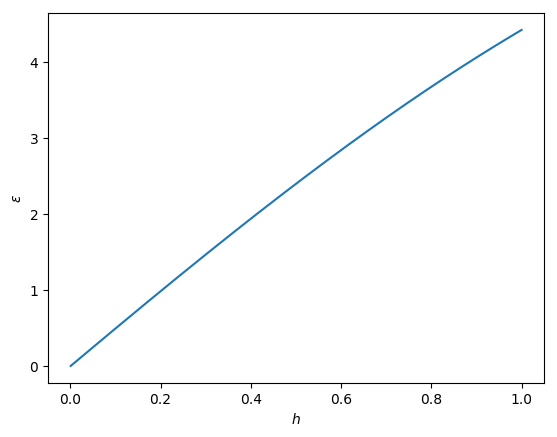

In [46]:
xlabel(L"$h$")
ylabel(L"$\epsilon$")
plot(h,A[2]);

Se observa que el error que introduce esta aproximación escala con $h$.

### Ejercicio 3

El error del método anterior se puede mejorar a que escale como $h^{2}$ al observar de las series de Taylor de $\:f(x+h)$ y $\:f(x-h)$:

$$f(x+h)=f\left(x\right)+h\left.\frac{d}{d\xi}\:f\left(\xi\right)\right|_{\substack{\xi=x}}+\frac{h^{2}}{2}\left.\frac{d^{2}}{d\xi^{2}}\:f\left(\xi\right)\right|_{\substack{\xi=x}}+\frac{h^{3}}{6}\left.\frac{d^{3}}{d\xi^{3}}\:f\left(\xi\right)\right|_{\substack{\xi=x}}+\mathcal{O}\left(h^{4}\right).$$

$$f(x-h)=f\left(x\right)-h\left.\frac{d}{d\xi}\:f\left(\xi\right)\right|_{\substack{\xi=x}}+\frac{h^{2}}{2}\left.\frac{d^{2}}{d\xi^{2}}\:f\left(\xi\right)\right|_{\substack{\xi=x}}-\frac{h^{3}}{6}\left.\frac{d^{3}}{d\xi^{3}}\:f\left(\xi\right)\right|_{\substack{\xi=x}}+\mathcal{O}\left(h^{4}\right).$$

Entonces:

$$f(x+h)-f(x-h)=2h\:f'(x)+\frac{h^{3}}{3}\left.\frac{d^{3}}{d\xi^{3}}\:f\left(\xi\right)\right|_{\substack{\xi=x}}+\mathcal{O}\left(h^{5}\right).$$

$$\frac{f(x+h)-f(x-h)}{2h}=f'(x)+\frac{h^{2}}{6}\left.\frac{d^{3}}{d\xi^{3}}\:f\left(\xi\right)\right|_{\substack{\xi=x}}+\mathcal{O}\left(h^{4}\right).$$

$$\therefore\:\:\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}\left(h^{2}\right).$$

Por lo tanto la _derivada numérica simétrica_ (la de hacia adelante menos la de hacia atras), tiene un error que escala como $h^{2}$. Así:

$$f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}$$

Existen otras formas de aproximar la derivada numérica de una función para que el error sea pequeño sin necesidad de hacer prohibitivamente $h$ muy pequeña. Una manera de hacerlo es tomando más puntos alrededor del punto donde se quiere la derivada numérica, esto es: si se observa la derivada hacia adelante, se ve que se toma la función evaluada en el punto $x_{0}$ y en el punto $x_{0}+h$, mientras que la simétrica toma los puntos $x_{0}-h$ y $x_{0}+h$, es decir que la derivada simétrica posee mayor información del la función alrededor de $x_{0}$. Por lo que para mejorar el error se pueden tomar más puntos alrededor de $x_{0}$, esta elección es, evidentemente, no trivial ya que por ejemplo en la derivada simétrica el factor que acompaña a $\:f(x+h)$ es $1/2h$ y para $\:f(x-h)$ es $-1/2h$.

De la antepenúltima ecuación se tiene que el error relativo para la diferencia simétrica es:

$$\varepsilon=\left|\frac{\delta\:f(x_{0},h)/2h-f'(x_{0})}{f'(x_{0})}\right|=\frac{h^{2}}{6}\left|\frac{f'''(x_{0})}{f'(x_{0})}\right|+\mathcal{O}\left(h^{4}\right)$$

Por lo que el error relativo va como $h^{2}$.

### Ejercicio 4

Se realiza un programa que aproxima la derivada en un punto por su derivada numérica simétrica.

In [31]:
function derivada_Simetrica(f,x0,h)
    
    x = Sym("x")
    df = lambdify(diff(f(x)),[x])   # Se usa esto para calcular el error relativo.
    
    D = (f(x0+h)-f(x0-h))./(2*h)    # Lista con las aproximaciones a la derivada.
    E = (D - df(x0) )/df(x0)        # Lista con los errores relativos.
    
    return D,abs.(E)                # La salida es el vector D que tiene las aproximaciones y el valor absoluto
                                    # del vector E que tiene los errores relativos.
end;

In [32]:
f(x)=cos.(x);

In [33]:
h=linspace(0,1,1000);

In [34]:
S = derivada_Simetrica(f,0.1,h);

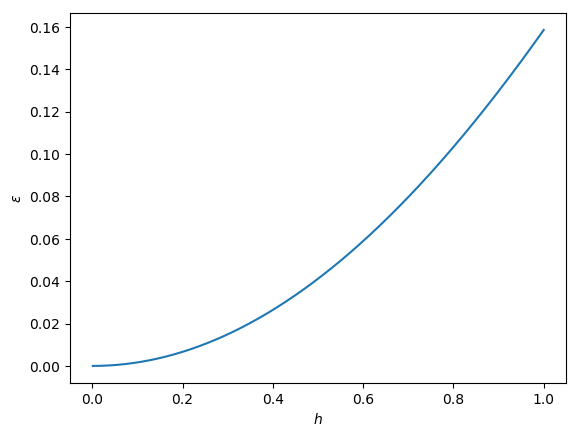

In [35]:
xlabel(L"$h$")
ylabel(L"$\epsilon$")
plot(h,S[2]);

Se observa que el error con esta aproximación escala con $h^{2}$. Para compararlo mejor con la aproximación anterior se colocan ambas curvas en una sola gráfica.

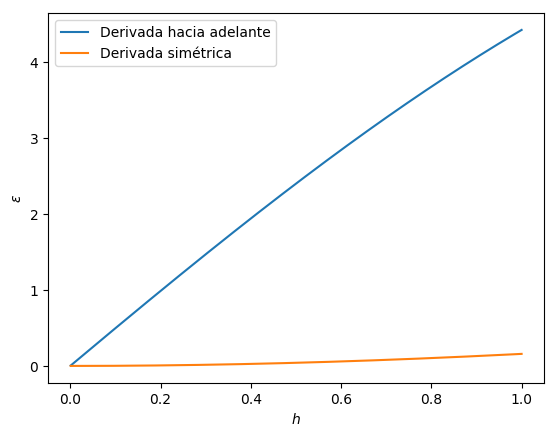

In [52]:
xlabel(L"$h$")
ylabel(L"$\epsilon$")
plot(h,A[2],label="Derivada hacia adelante")
plot(h,S[2],label="Derivada simétrica")
legend()
show();

Es evidente la diferencia de ambas aproximaciones para el mismo conjunto de $h$'s.

### Ejercicio 5

Tenemos el operador _diferencia finita hacia adelante_ $\Delta_h:\:f(x)\mapsto\:f(x+h)-f(x)$. Probemos que es lineal: Sean $\:f,\:g$ dos funciones, y sean $\alpha,\beta\in\mathbb{R}$, entonces:

$$\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=(\alpha\:f+\beta\:g)(x+h)-(\alpha\:f+\beta\:g)(x)=\alpha\:f(x+h)+\beta\:g(x+h)-\alpha\:f(x)-\beta\:g(x)$$

$$\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=\alpha\left[\:f(x+h)-f(x)\right]+\beta\left[g(x+h)-g(x)\right]=\alpha\Delta_{h}\:f(x)+\beta\Delta_{h}\:g(x)$$

$$\therefore\:\:\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=\alpha\Delta_{h}\:f(x)+\beta\Delta_{h}\:g(x)$$

Entonces el operador $\Delta_{h}$ es lineal. Luego, dado que

$$\Delta_{h}\:f(x)=f(x+h)-f(x)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^{n}}{d\xi^{n}}\:f(\xi)\right|_{\substack{\xi=x}},$$

como $\Delta_{h}$ es lineal, entonces

$$\Delta_{h}\:f(x)=\left[\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\xi=x}}\right]\:f(x).$$

$$\therefore\:\:\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\xi=x}}$$

### Ejercicio 6

Encontraremos una expresión para la derivada exacta en términos del operador diferencia finita hacia adelante $\Delta_{h}$. Para ello observemos lo siguiente: Si identificamos al operador diferencia finita hacia adelante como una función $\phi$, esto significa que:

$$\Delta_{h}=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\xi=x}}.$$

Recordando que para el caso un operador $T$ (como es la derivada) se tiene que $T^{2}=T\circ T$, por lo que:

$$\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)^{n}.$$

Por otro lado se tiene que $\displaystyle e^{x}-1=\sum_{n=1}^{\infty}\frac{x^{n}}{n!}$, por lo tanto:

$$\Delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-1,$$

es justo de esta expresión que podemos despejar el operador derivada exacta en términos del operador diferencia finita hacia adelante:

$$\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\log\left(1+\Delta_{h}\right)$$

$$\therefore\:\:\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\sum_{n=1}^{\infty}\frac{(-1)^{n+1}}{n}\Delta_{h}^{\:n}=\frac{1}{h}\left(\Delta_{h}-\frac{1}{2}\Delta_{h}^{\:2}+\cdots\right).$$

Se observa que si se trunca la serie hasta $n=1$ se obtiene la aproximación de la derivada numérica hacia adelante presentada el el ejercicio 1. Así que esta expresión nos dice que entre más términos se tomen de la serie, la aproximación será mejor.

### Ejercicio 7

Definamos ahora el operador _diferencia finita simétrica_ $\delta_{h}:\:f(x)\mapsto\:f(x+h)-f(x-h)$. Notemos lo siguiente:

$$(\Delta_{h}-\Delta_{-h})\:f(x)=\Delta_{h}\:f(x)-\Delta_{-h}\:f(x)=f(x+h)-f(x)-f(x-h)+f(x),$$

$$(\Delta_{h}-\Delta_{-h})\:f(x)=f(x+h)-f(x-h).$$

Por lo tanto $\delta_{h}=\Delta_{h}-\Delta_{-h}$, ergo:

$$\delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-1-\exp\left(-h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)+1,$$

$$\delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-\exp\left(-h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right),$$

$$\delta_{h}=2\:\mathrm{senh}\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)$$

Por lo que, al despejar el operador derivada exacta:

$$\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\:\mathrm{senh}^{-1}\left(\frac{\delta_{h}}{2}\right)$$

Encontrar la serie de $\mathrm{senh}^{-1}(x)$ no es difícil, basta encontrar la serie de su derivada e integrarla término a término, lo cual es posible hacer en el radio de convergencia.

$$\frac{d}{dx}\mathrm{senh}^{-1}(x)=\frac{1}{\mathrm{senh}'(\mathrm{senh}^{-1}(x))}=\frac{1}{\cosh(\mathrm{senh}^{-1}(x))}=\frac{1}{\sqrt{1+\mathrm{senh}^{2}(\mathrm{senh}^{-1}(x))}}$$

$$\frac{d}{dx}\mathrm{senh}^{-1}(x)=\frac{1}{\sqrt{1+x^{2}}}$$

Por el teorema generalizado del binomio tenemos que:

$$\frac{1}{\sqrt{1+x^{2}}}=\left(1+x^{2}\right)^{-1/2}=\sum_{n=0}^{\infty}\binom{-1/2}{n}x^{2n}.$$

En donde:

$$\binom{-1/2}{n}=\frac{1}{n!}\prod_{k=0}^{n-1}\left(-\frac{1}{2}-k\right)=\frac{(-1)^{n}(2n-1)!!}{2^{n}n!}=\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}},$$

por lo que:

$$\frac{1}{\sqrt{1+x^{2}}}=\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}}x^{2n}$$

Luego así:

$$\mathrm{senh}^{-1}(x)=\int_{0}^{x}\frac{1}{\sqrt{1+t^{2}}}\:dt=\int_{0}^{x}\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}}t^{2n}\:dt=\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}}\int_{0}^{x}t^{2n}\:dt.$$

Y como $\displaystyle\int_{0}^{x}t^{2n}\:dt=\frac{x^{2n+1}}{2n+1}$, se tiene que:

$$\mathrm{senh}^{-1}(x)=\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}(2n+1)}x^{2n+1}.$$

$$\therefore\:\:\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{2h}\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{2n}(n!)^{2}(2n+1)}\delta_{h}^{\:2n+1}=\frac{1}{2h}\left(\delta_{h}-\frac{1}{24}\delta_{h}^{\:2}+\cdots\right).$$

Observamos que truncando para $n=0$ se tiene el resultado del ejercicio 3.

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>